### Μηχανική Μάθηση
#### 2η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2023-24



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

### Εισαγωγή
Στην άσκηση αυτή θα χρησιμοποιήσετε τη μέθοδο συσταδοποίησης k-Μeans, καθώς και τη μέθοδο μείωσης διαστατικότητας PCA σε υπερφασματική εικόνα.

Ονοματεπώνυμο φοιτητή: Καμπουγέρης Χαράλαμπος

Α.Μ.: 03120098

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
path="" # με ευκόλο τρόπο μπορείτε να αλλάξετε το path που είναι αποθηκευμένα τα αρχεία σας

Mounted at /content/drive


### 1. Φόρτωση υπερφασματικής εικόνας

Κατεβάστε την υπερφασματική εικόνα `indian_pines_corrected.npy` και τις αντίστοιχες επισημειώσεις `indian_pines_gt.npy` από το Google Drive:
https://drive.google.com/drive/folders/15hbGoLga9n4K6wxRP6qsLV1P-7Nj-Vht?usp=sharing

1.α. Φορτώστε την εικόνα με χρήση της συνάρτησης numpy.load

In [2]:
path = '/content/drive/MyDrive/indian_pines_corrected.npy'

import numpy as np
img = np.load(path)

1.β. Χρησιμοποιώντας την ίδια συνάρτηση, φορτώστε τις αντίστοιχες επισημειώσεις ανά pixel εικόνας `indian_pines_gt.npy`. Οι επισημειώσεις αυτές αντιστοιχίζουν κάθε pixel της υπερφασματικής εικόνας σε ένα τύπο από 17 διαφορετικές κατηγορίες (η επισημείωση 0 αντιστοιχεί σε "Undefined"):

```python
classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]
```

In [6]:
classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]

In [3]:
labels = np.load('/content/drive/MyDrive/indian_pines_gt.npy')

### 2. Οπτικοποίηση και Διερευνητική ανάλυση δεδομένων

Παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. Βρείτε το ύψος και το πλάτος της εικόνας, καθώς και τον αριθμό των υπερφασματικών καναλιών

2β. Σχεδιάστε με χρήση της matplotlib το 3ο, 65ο, και 95ο κανάλι της εικόνας

2γ. Υπολογίστε τον αριθμό των διαφορετικών κατηγοριών καλλιέργειας/κλάσης στις επισημειώσεις

2δ. Σχεδιάστε με χρήση της matplotlib τις επισημειώσεις σε μορφή εικόνας. Προσθέστε επιπλέον επεξηγηματική λεζάντα με χρήση της βιβλιοθήκης κάθε επισημείωσης (χρησιμοποιήστε τη λίστα `classes` που σας δόθηκε προηγουμένως).

2ε. Υπολογίστε πόσα pixels της εικόνας αντιστοιχούν σε κάθε τύπο καλλιέργειας

**2α**

In [4]:
dimensions = img.shape
height = img.shape[0]
width = img.shape[1]
channels = img.shape[2]

print('Image Dimension    : ',dimensions)
print('Image Height       : ',height)
print('Image Width        : ',width)
print('Number of Channels : ',channels)

Image Dimension    :  (145, 145, 200)
Image Height       :  145
Image Width        :  145
Number of Channels :  200


**2β**

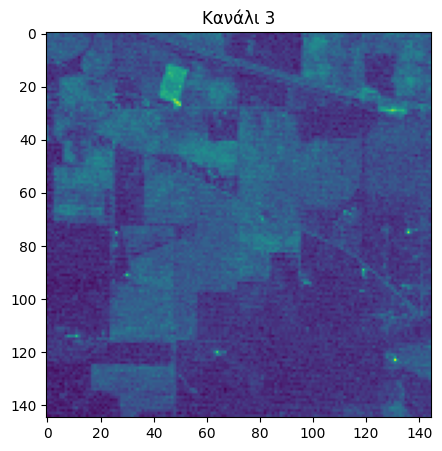

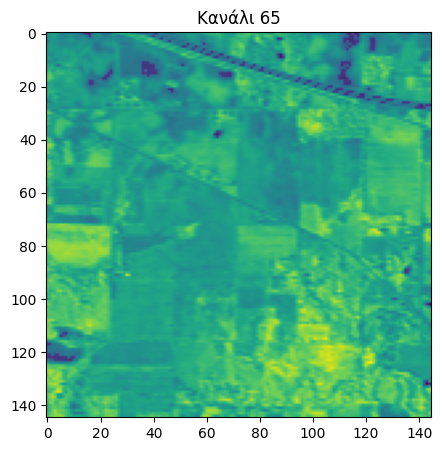

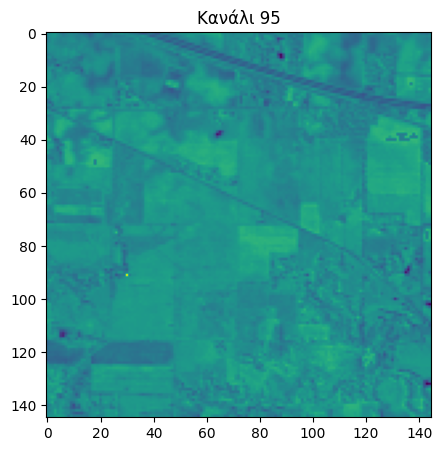

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.title(f'Κανάλι {3}')
plt.imshow(img[:,:,2])
plt.figure(figsize=(15,5))
plt.title(f'Κανάλι {65}')
plt.imshow(img[:,:,64])
plt.figure(figsize=(15,5))
plt.title(f'Κανάλι {95}')
plt.imshow(img[:,:,94])

**2γ**

In [ ]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=uint8)

**2δ**

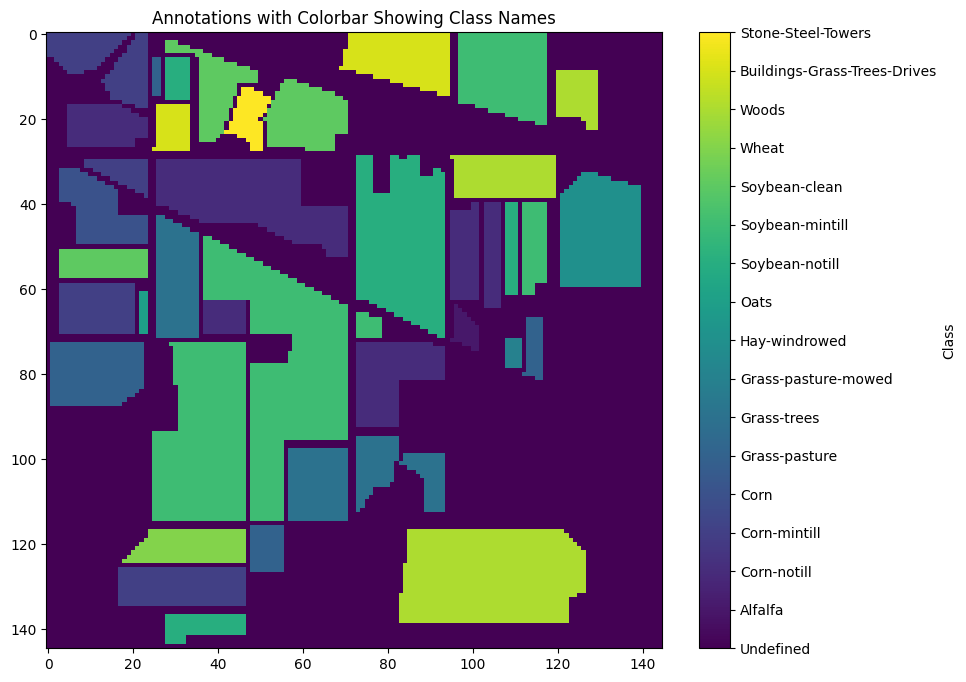

In [28]:
from matplotlib.colors import ListedColormap

# Map numerical values to string class names
mapped_labels = np.vectorize(lambda x: classes[int(x)])(labels)

# Plot the labels in image format
plt.figure(figsize=(12, 8))
plt.imshow(labels)

# Create a custom colormap with the same number of colors as unique labels
cmap = ListedColormap(['#{:02x}{:02x}{:02x}'.format(int(r * 255), int(g * 255), int(b * 255)) for r, g, b, _ in plt.cm.jet(np.linspace(0, 1, len(classes)))])

# Create colorbar manually and set tick labels
cbar = plt.colorbar(ticks=np.unique(labels), label='Class', orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_ticklabels(classes)

plt.title("Annotations with Colorbar Showing Class Names")
plt.show()


**2ε**

In [29]:
numbers = np.unique(labels, return_counts=True)
num = numbers[1]
num

array([10776,    46,  1428,   830,   237,   483,   730,    28,   478,
          20,   972,  2455,   593,   205,  1265,   386,    93])

In [30]:
np.vstack((classes, num)).T

array([['Undefined', '10776'],
       ['Alfalfa', '46'],
       ['Corn-notill', '1428'],
       ['Corn-mintill', '830'],
       ['Corn', '237'],
       ['Grass-pasture', '483'],
       ['Grass-trees', '730'],
       ['Grass-pasture-mowed', '28'],
       ['Hay-windrowed', '478'],
       ['Oats', '20'],
       ['Soybean-notill', '972'],
       ['Soybean-mintill', '2455'],
       ['Soybean-clean', '593'],
       ['Wheat', '205'],
       ['Woods', '1265'],
       ['Buildings-Grass-Trees-Drives', '386'],
       ['Stone-Steel-Towers', '93']], dtype='<U28')

### 3. Εύρεση φασματικών υπογραφών

3.α. Μετατρέψτε την υπερφασματική εικόνα και τις επισημειώσεις σε μορφή κατάλληλη για περαιτέρω επεξεργασία. Η εικόνα θα πρέπει να μετατραπεί σε πίνακα N x Κ, όπου Ν είναι ο αριθμός των pixels και K ο αριθμός των καναλιών. Οι επισημειώσεις αντίστοιχα θα πρέπει να μετατραπούν σε διάνυσμα μήκους Ν. Στη συνέχεια, αφαιρέστε όσα δεδομένα είναι επισημειωμένα ως `Undefined`.

💡 Χρησιμοποιήστε την `numpy reshape`

In [31]:
n, m, c = img.shape
image = img.reshape((n*m),c)
image

array([[3172, 4142, 4506, ..., 1057, 1020, 1020],
       [2580, 4266, 4502, ..., 1064, 1029, 1020],
       [3687, 4266, 4421, ..., 1061, 1030, 1016],
       ...,
       [3153, 3864, 4282, ..., 1003, 1008, 1000],
       [3155, 4104, 4106, ..., 1011, 1005, 1003],
       [3323, 3860, 4197, ..., 1007, 1004, 1000]], dtype=uint16)

In [34]:
image.shape

(21025, 200)

In [33]:
labels2 = labels.flatten()

undefined = np.where(labels2 == 0)
undefined

(array([   20,    24,    25, ..., 21022, 21023, 21024]),)

In [37]:
nimage = np.delete(image,undefined[0],axis = 0)

In [38]:

nlabels = np.delete(labels2,undefined[0],axis = 0)

3.β. Επιλέξτε ένα τυχαίο pixel της εικόνας από κάθε κατηγορία, είτε με προγραμματιστικό τρόπο, είτε χειροκίνητα.

3.γ. Γράψτε κώδικα για να σχεδιάσετε την υπερφασματική υπογραφή των επιλεγμένων pixels.

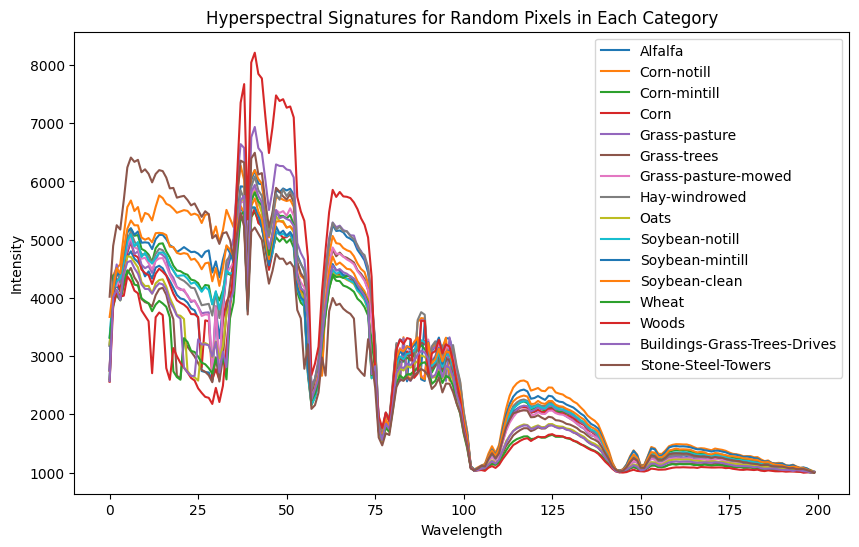

In [43]:
import numpy as np
import matplotlib.pyplot as plt

arr = np.arange(200)

# Assuming nlabels represents the labels for each pixel
unique_labels = np.unique(nlabels)

# Set up the plot
plt.figure(figsize=(10, 6))

for label in unique_labels:
    # Find indices of pixels with the current label
    pixel_indices = np.where(nlabels == label)

    # Randomly select one pixel index
    random_pixel_index = np.random.choice(pixel_indices[0])

    # Extract the hyperspectral signature for the selected pixel
    hyperspectral_signature = nimage[random_pixel_index]

    # Get the actual class name from the classes list
    class_name = classes[int(label)]

    # Plot the hyperspectral signature with a unique color for each category and label
    plt.plot(arr, hyperspectral_signature, label=f'{class_name}')

# Add legend
plt.legend()

# Add labels and title
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Hyperspectral Signatures for Random Pixels in Each Category')

plt.show()

3.δ. Επαναλάβετε την προηγούμενη διαδικασία άλλες δύο φορές, σχεδιάζοντας τα νέα διαγράμματα.

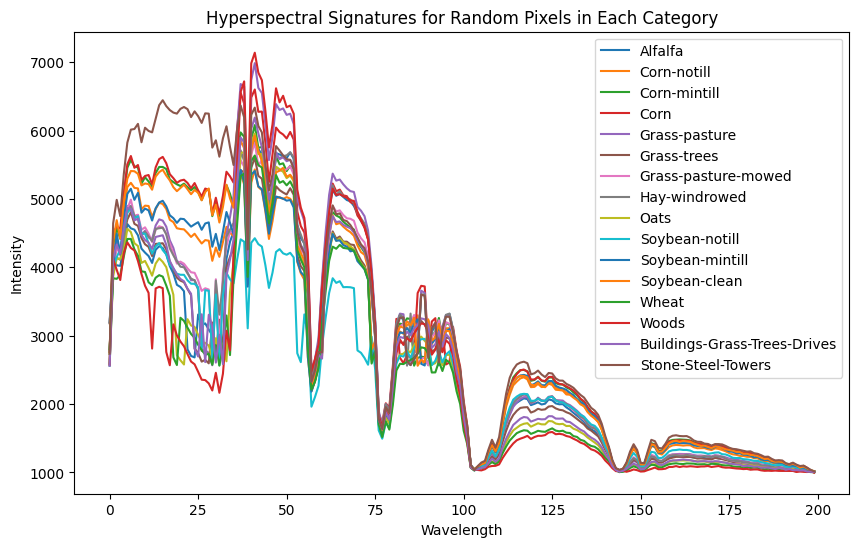

In [44]:
import numpy as np
import matplotlib.pyplot as plt

arr = np.arange(200)

# Assuming nlabels represents the labels for each pixel
unique_labels = np.unique(nlabels)

# Set up the plot
plt.figure(figsize=(10, 6))

for label in unique_labels:
    # Find indices of pixels with the current label
    pixel_indices = np.where(nlabels == label)

    # Randomly select one pixel index
    random_pixel_index = np.random.choice(pixel_indices[0])

    # Extract the hyperspectral signature for the selected pixel
    hyperspectral_signature = nimage[random_pixel_index]

    # Get the actual class name from the classes list
    class_name = classes[int(label)]

    # Plot the hyperspectral signature with a unique color for each category and label
    plt.plot(arr, hyperspectral_signature, label=f'{class_name}')

# Add legend
plt.legend()

# Add labels and title
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Hyperspectral Signatures for Random Pixels in Each Category')

plt.show()

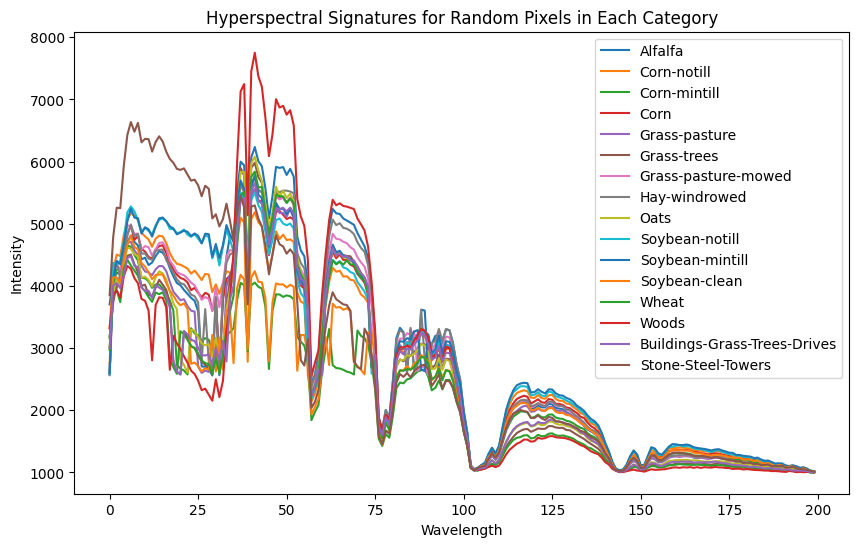

In [45]:
import numpy as np
import matplotlib.pyplot as plt

arr = np.arange(200)

# Assuming nlabels represents the labels for each pixel
unique_labels = np.unique(nlabels)

# Set up the plot
plt.figure(figsize=(10, 6))

for label in unique_labels:
    # Find indices of pixels with the current label
    pixel_indices = np.where(nlabels == label)

    # Randomly select one pixel index
    random_pixel_index = np.random.choice(pixel_indices[0])

    # Extract the hyperspectral signature for the selected pixel
    hyperspectral_signature = nimage[random_pixel_index]

    # Get the actual class name from the classes list
    class_name = classes[int(label)]

    # Plot the hyperspectral signature with a unique color for each category and label
    plt.plot(arr, hyperspectral_signature, label=f'{class_name}')

# Add legend
plt.legend()

# Add labels and title
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Hyperspectral Signatures for Random Pixels in Each Category')

plt.show()

3.ε. Σημειώστε τις παρατηρήσεις σας και τα συμπεράσματα σας. Προσπαθήστε να απαντήσετε στις ακόλουθες ερωτήσεις:
    
* Με βάση τα προηγούμενα διαγράμματα θεωρείτε ότι κάποιες καλλιέργειες είναι πιο εύκολα διαχωρίσιμες από άλλες με βάση τη φασματική υπογραφή τους;
* Θεωρείτε ότι όλα τα κανάλια παρέχουν χρήσιμη πληροφορία για το διαχωρισμό;

***Απάντηση***

Με βάση τα τρία διαγράμματα στα οποία λαμβάνονται κάθε φορά τυχαία pixel παρατηρούμε ότι η καλλιέργεια Grass-trees έχει το υψηλότερο intensity από όλες τις άλλες στην περιοχή [0,25], γεγονός που διευκολύνει την ανίχνευση σε αυτό το εύρος καναλιών. Αντίστοιχα η καλλιέργεια Corn στην περιοχή [30,50] παρουσιάζει αρκετή διαφορά στο intensity σε σχέση με τις άλλες καλλιέργειες.

Παρατηρούμε ότι δεν παρέχουν όλα τα κανάλια χρήσιμη πληροφορία, καθώς το intensity των καλλιεργιών στα περισσότερα από αυτά είναι παρόμοιο και δεν είναι εύκολη η διαφοροποίηση τους. Μεγαλύτερη χρησιμότητα παρουσιάζουν το εύρως καναλιών [0,25] και [30,50] για τους λόγους που εξηγήσαμε παραπάνω.

3.στ. Σχεδιάστε ένα heatmap, που να δείχνει τη συσχέτιση μεταξύ των διαφορετικών καναλιών

<Axes: >

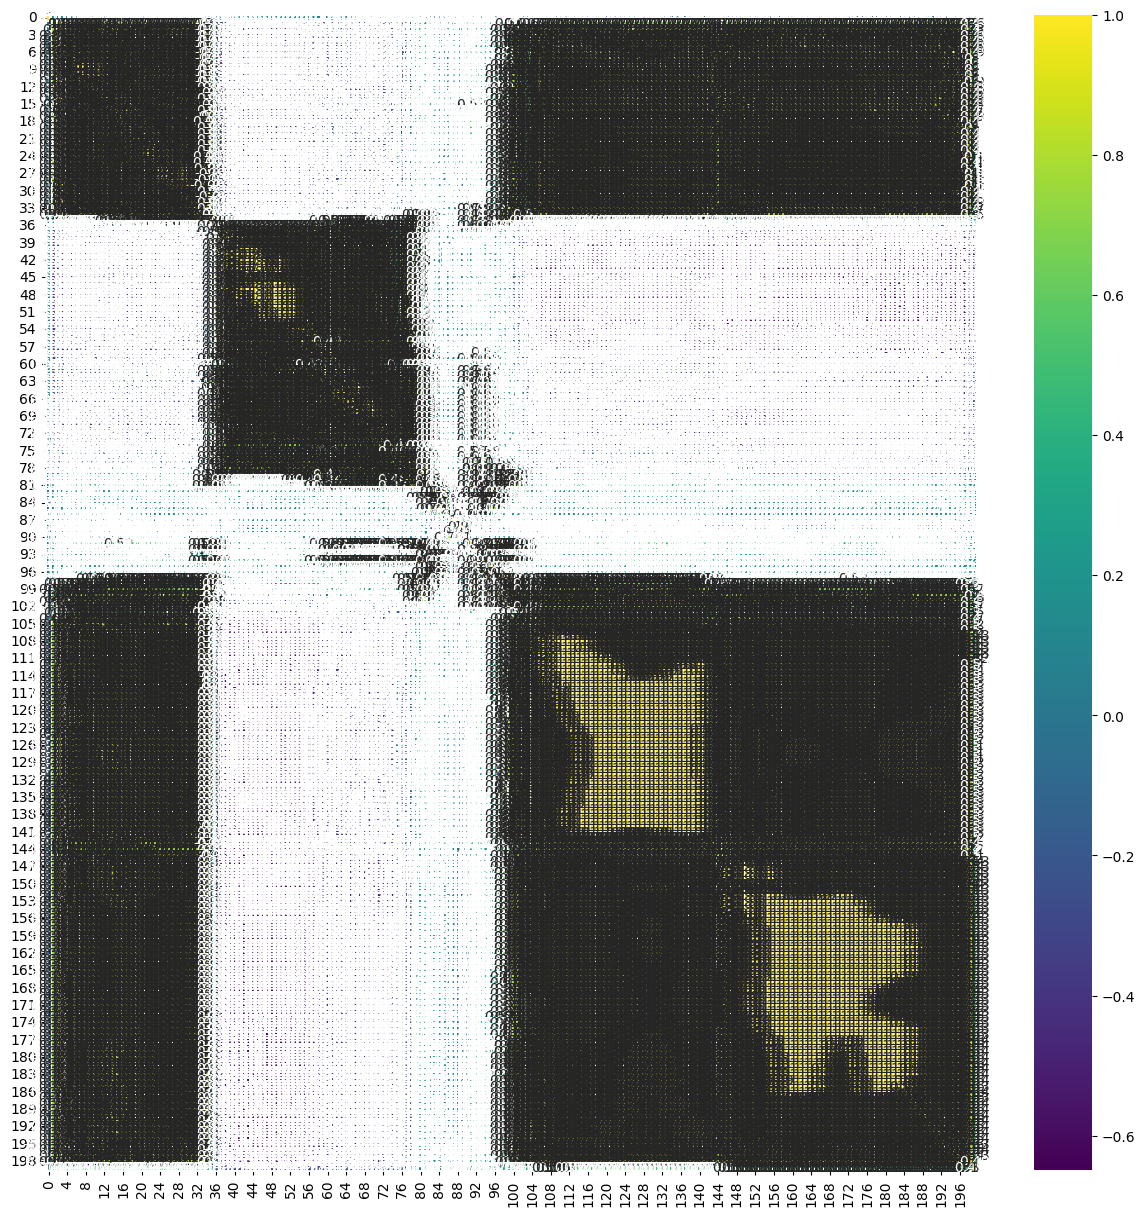

In [50]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
im = pd.DataFrame(nimage)
corr_matrix = im.corr()
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sn.heatmap(corr_matrix,cmap="viridis", annot=True,linewidths=.5, ax=ax)



### 4. Συσταδοποίηση με χρήση του αλγορίθμου k-Means

 4.α. Εφαρμόστε τον αλγόριθμο k-Means (sklearn.cluster) στα δεδομένα (εφόσον κάνατε την προεπεξεργασία του Βήματος 3). Χρησιμοποιήστε την τιμή `n_cluster=16`.

In [51]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

# extra code – the exact arguments of make_blobs() are not important
nimage.shape

(10249, 200)

In [52]:
kmeans = KMeans(n_clusters=16, n_init=10, max_iter=1,
                      random_state=42)
y_pred = kmeans.fit_predict(nimage)


In [53]:
kmeans.cluster_centers_

array([[2898.61578947, 4002.44385965, 4153.92982456, ..., 1022.67719298,
        1011.22105263, 1007.12105263],
       [2980.61435726, 4322.18308292, 4571.26655537, ..., 1059.93377852,
        1030.13188648, 1013.74680022],
       [3032.62361111, 3887.73333333, 4025.175     , ..., 1007.80416667,
        1004.84027778, 1004.10694444],
       ...,
       [3024.99560117, 3902.        , 4033.        , ..., 1007.98387097,
        1005.08504399, 1004.46627566],
       [3075.20477816, 3903.23549488, 4027.68600683, ..., 1014.39931741,
        1007.87713311, 1005.32423208],
       [3850.55714286, 4869.41428571, 5210.97142857, ..., 1038.97142857,
        1020.55714286, 1010.1       ]])

4.β. Υπολογίστε τις ακόλουθες μετρικές των προβλέψεων του αλγορίθμου

* Accuracy Score
* Rand Score
* Silhouette Score

Σημειώστε ότι για τη συνάρτηση rand_score μπορείτε να δώσετε σαν είσοδο τα αρχικά labels που σας δόθηκαν μαζί με τα predicted. Για τον υπολογισμό όμως του accuracy, θα πρέπει να αντιστοιχίσουμε τα διαφορετικά ID των clusters στην έξοδο του KMeans, με τις κατηγορίες της αρχικής επισημείωσης. Για την μετατροπή αυτή μπορείτε να χρησιμοποιήσετε την ακόλουθη συνάρτηση που σας δίνεται `translate_predicted_labels`.

In [54]:
from sklearn.metrics import silhouette_score

In [55]:
!pip install munkres
from munkres import Munkres

def make_cost_matrix(c1, c2):
    """
    """
    uc1 = np.unique(c1)
    uc2 = np.unique(c2)
    l1 = uc1.size
    l2 = uc2.size
    assert(l1 == l2 and np.all(uc1 == uc2))

    m = np.ones([l1, l2])
    for i in range(l1):
        it_i = np.nonzero(c1 == uc1[i])[0]
        for j in range(l2):
            it_j = np.nonzero(c2 == uc2[j])[0]
            m_ij = np.intersect1d(it_j, it_i)
            m[i,j] =  -m_ij.size
    return m

def translate_clustering(clt, mapper):
    return np.array([ mapper[i] for i in clt ])

def accuracy(cm):
    """computes accuracy from confusion matrix"""
    return np.trace(cm, dtype=float) / np.sum(cm)


def translate_predicted_labels(predicted_y, y):
    cost_matrix = make_cost_matrix(predicted_y, y)
    m = Munkres()
    indexes = m.compute(cost_matrix)
    mapper = { old: new for (old, new) in indexes }

    for old, new in mapper.items():
        print("map: %s --> %s" %(old, new))

    translated_predicted_y = translate_clustering(predicted_y, mapper)
    return translated_predicted_y

# usage:
# translate_predicted_labels(predicted, gt)
# predicted: N, array of predicted labels (predicted cluster IDs)
# gt: N, array of ground truth classes

In [56]:
nlabels = nlabels-1

In [57]:
y_pred1 = translate_predicted_labels(y_pred, nlabels)
print(y_pred1)

map: 0 --> 8
map: 1 --> 10
map: 2 --> 4
map: 3 --> 6
map: 4 --> 11
map: 5 --> 5
map: 6 --> 14
map: 7 --> 3
map: 8 --> 1
map: 9 --> 7
map: 10 --> 0
map: 11 --> 2
map: 12 --> 9
map: 13 --> 13
map: 14 --> 12
map: 15 --> 15
[ 9 10 10 ...  6  6  2]


In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(nlabels,y_pred1)

0.35974241389403844

In [59]:
from sklearn.metrics.cluster import rand_score
rand_score( nlabels,y_pred)

0.8493192420516797

In [60]:
silhouette_score(nimage, kmeans.labels_)

0.28198801796131895

4.δ. Σχεδιάστε το confusion matrix (χρησιμοποιήστε τα αντιστοιχισμένα predicted labels).

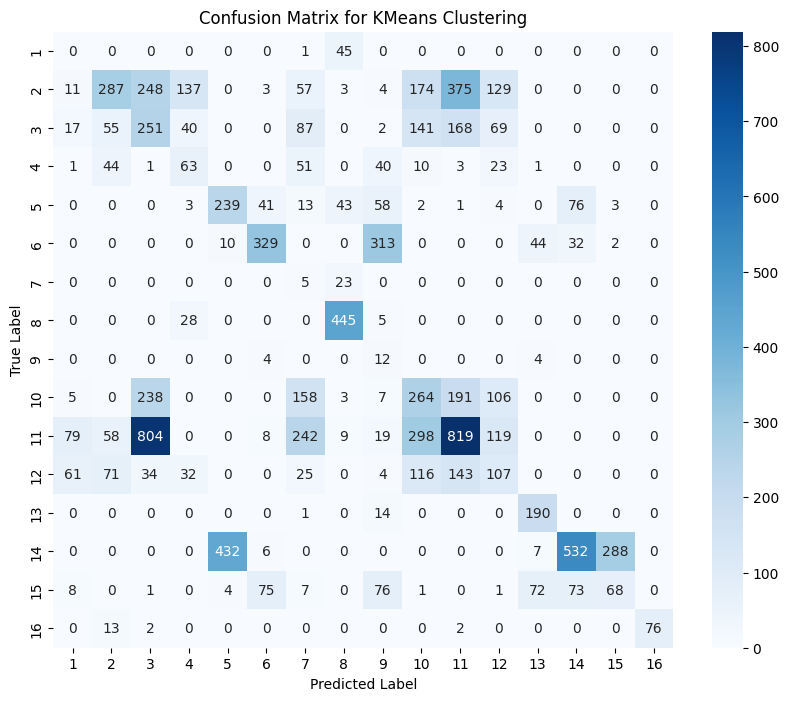

In [63]:
from sklearn.metrics import confusion_matrix



num_labels = len(np.unique(nlabels))
conf_matrix = confusion_matrix(nlabels, y_pred1, labels = range(num_labels))


# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, n_cluster + 1), yticklabels=range(1, n_cluster + 1))
plt.title('Confusion Matrix for KMeans Clustering')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

4.ε. Όπως στο 2.δ. σχεδιάστε με χρήση της matplotlib τα predicted labels σε μορφή εικόνας.

In [200]:

array_size = 21025
x = 0

my_array = np.ones(array_size)

my_array[undefined[0]] = 0


for i in range(21025):
    if my_array[i] == 1:
        my_array[i] = y_pred1[x]
        x += 1


In [208]:
my_array

array([9., 2., 2., ..., 0., 0., 0.])

In [204]:
np.unique(my_array_reshaped)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15.])

Δεν υπάρχει η καλλιέργεια 16, στον νέο πίνακα οπότε την αφαιρούμε από την κλάση

In [205]:
classes2 = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives"
]

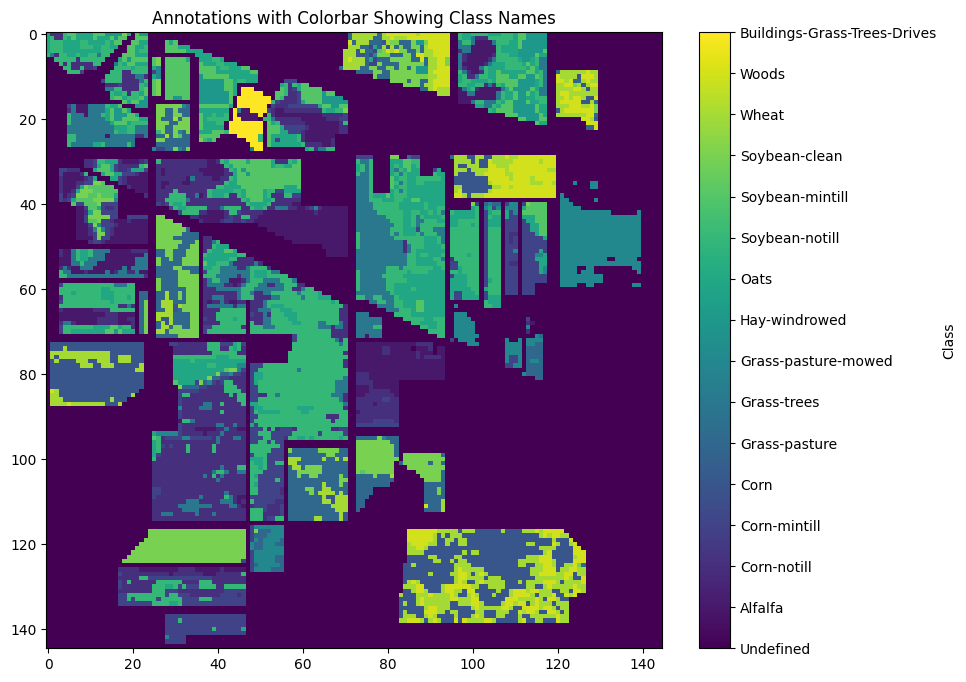

In [207]:
from matplotlib.colors import ListedColormap

# Map numerical values to string class names
my_array_reshaped = my_array.reshape(labels.shape)
mapped_labels = np.vectorize(lambda x: classes[int(x)])(my_array_reshaped)

# Plot the labels in image format
plt.figure(figsize=(12, 8))
plt.imshow(my_array_reshaped)

# Create a custom colormap with the same number of colors as unique labels
cmap = ListedColormap(['#{:02x}{:02x}{:02x}'.format(int(r * 255), int(g * 255), int(b * 255)) for r, g, b, _ in plt.cm.jet(np.linspace(0, 1, len(classes2)))])

# Create colorbar manually and set tick labels
cbar = plt.colorbar(ticks=np.unique(my_array_reshaped), label='Class', orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_ticklabels(classes2)

plt.title("Annotations with Colorbar Showing Class Names")
plt.show()

### 5. Μείωση διαστατικότητας δεδομένων

5.α. Εφαρμόστε στα δεδομένα τη μέθοδο μείωσης διαστατικότητας PCA. Επιλέξτε `n_components=3`

In [72]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X2D = pca.fit_transform(nimage)

In [73]:
pca.components_

array([[ 2.77701686e-04, -3.26728454e-02, -4.15723863e-02,
        -4.76594626e-02, -6.08432890e-02, -7.34839771e-02,
        -8.40517582e-02, -8.86804515e-02, -9.67136437e-02,
        -9.81942912e-02, -1.06531385e-01, -1.16168317e-01,
        -1.35826575e-01, -1.10647405e-01, -1.10783820e-01,
        -1.15576851e-01, -1.35576664e-01, -1.55484147e-01,
        -1.46472542e-01, -1.52895974e-01, -1.56756003e-01,
        -1.62266213e-01, -1.65217314e-01, -1.66768404e-01,
        -1.73711584e-01, -1.78083614e-01, -1.78048968e-01,
        -1.90624620e-01, -1.93697384e-01, -1.71944287e-01,
        -1.62220300e-01, -1.68705677e-01, -1.62867096e-01,
        -1.44304572e-01, -9.21368292e-02, -2.06779100e-02,
         3.60995124e-02,  8.86085895e-02,  1.10597807e-01,
         8.55802623e-02,  1.27700542e-01,  1.31588295e-01,
         1.23738610e-01,  1.21807098e-01,  1.10011371e-01,
         9.78163439e-02,  1.04395967e-01,  1.14334995e-01,
         1.12451228e-01,  1.11875686e-01,  1.09527938e-0

5.β. Τι ποσοστό της διακύμανσης των δεδομένων διατηρείτε με `n_components=3` ?
Hint: sklearn.decomposition.PCA.explained_variance_ratio_

In [74]:
pca.explained_variance_ratio_

array([0.66452713, 0.2654258 , 0.01206197])

In [75]:
print('Το ποσοστό της διακύμανσης των δεδομένων που διατηρείται είναι ',pca.explained_variance_ratio_.sum() ,'%')

Το ποσοστό της διακύμανσης των δεδομένων που διατηρείται είναι  0.9420148959771655 %


### 6. Συνδυασμός μείωσης διαστατικότητας και k-Means

6.α. Εφαρμόστε τον αλγόριθμο kmeans στα δεδομένα μειωμένης διαστατικότητας `n_components=3`, και υπολογίστε εκ νέου τις μετρικές του Βήματος 4.γ.

In [76]:
kmeans = KMeans(n_clusters=16, n_init=10, max_iter=1,
                      random_state=5)
y_pred = kmeans.fit_predict(X2D)

In [77]:
y_pred1 = translate_predicted_labels(y_pred, nlabels)
print(y_pred1)

map: 0 --> 3
map: 1 --> 2
map: 2 --> 13
map: 3 --> 1
map: 4 --> 14
map: 5 --> 6
map: 6 --> 11
map: 7 --> 7
map: 8 --> 9
map: 9 --> 8
map: 10 --> 4
map: 11 --> 12
map: 12 --> 0
map: 13 --> 15
map: 14 --> 5
map: 15 --> 10
[ 9 10 10 ...  2  2  2]


In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(nlabels,y_pred1)

0.3478388135427847

In [79]:
from sklearn.metrics.cluster import rand_score
rand_score( nlabels,y_pred)

0.8477414905922925

In [80]:
silhouette_score(nimage, kmeans.labels_)

0.2655273466709199

6.β. Δοκιμάστε διαφορετικές τιμές για το `n_components` (από 1 έως 10) και για κάθε μία από αυτές τις τιμές τρέξτε εκ νέου τον k-Μeans, υπολογίζοντας τα τελικά scores. Για κάθε μετρική, φτιάξτε ένα διάγραμμα που στον άξονα των Χ θα έχει τον αριθμό `n_components` και στον άξονα των Υ, την τιμή της μετρικής. Τι συμπεράσματα βγάζετε;

In [81]:
ac = np.empty([10])
rand = np.empty([10])
ss = np.empty([10])

In [82]:
for i in range(1,11):
  pca = PCA(n_components=i)
  x = pca.fit_transform(nimage)
  kmeans = KMeans(n_clusters=16, n_init=10, max_iter=1,random_state=5)
  y_pred = kmeans.fit_predict(x)
  y_pred1 = translate_predicted_labels(y_pred, nlabels)
  ac[i-1] = accuracy_score(nlabels,y_pred1)
  rand[i-1] = rand_score( nlabels,y_pred)
  ss[i-1] = silhouette_score(nimage, kmeans.labels_)


map: 0 --> 9
map: 1 --> 14
map: 2 --> 3
map: 3 --> 12
map: 4 --> 13
map: 5 --> 2
map: 6 --> 0
map: 7 --> 15
map: 8 --> 10
map: 9 --> 4
map: 10 --> 11
map: 11 --> 7
map: 12 --> 5
map: 13 --> 6
map: 14 --> 1
map: 15 --> 8
map: 0 --> 0
map: 1 --> 10
map: 2 --> 4
map: 3 --> 5
map: 4 --> 3
map: 5 --> 13
map: 6 --> 11
map: 7 --> 9
map: 8 --> 12
map: 9 --> 7
map: 10 --> 14
map: 11 --> 1
map: 12 --> 6
map: 13 --> 15
map: 14 --> 2
map: 15 --> 8
map: 0 --> 3
map: 1 --> 2
map: 2 --> 13
map: 3 --> 1
map: 4 --> 14
map: 5 --> 6
map: 6 --> 11
map: 7 --> 7
map: 8 --> 9
map: 9 --> 8
map: 10 --> 4
map: 11 --> 12
map: 12 --> 0
map: 13 --> 15
map: 14 --> 5
map: 15 --> 10
map: 0 --> 9
map: 1 --> 13
map: 2 --> 2
map: 3 --> 5
map: 4 --> 11
map: 5 --> 8
map: 6 --> 6
map: 7 --> 4
map: 8 --> 7
map: 9 --> 1
map: 10 --> 10
map: 11 --> 14
map: 12 --> 3
map: 13 --> 15
map: 14 --> 0
map: 15 --> 12
map: 0 --> 10
map: 1 --> 4
map: 2 --> 12
map: 3 --> 9
map: 4 --> 1
map: 5 --> 7
map: 6 --> 8
map: 7 --> 0
map: 8 --> 3
m

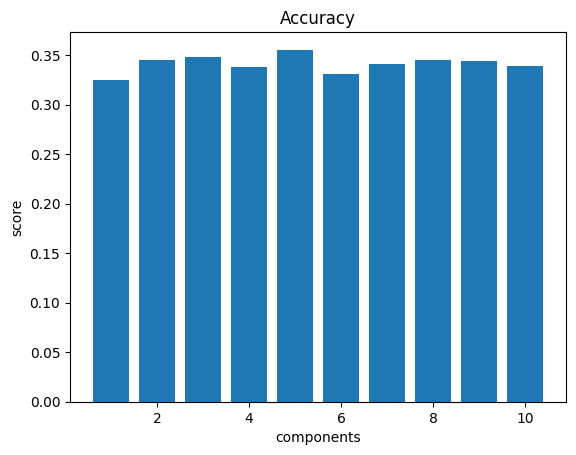

In [83]:
x1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.bar(x1, ac)
plt.plot()
plt.xlabel("components")
plt.ylabel("score")
plt.title("Accuracy")
plt.show()

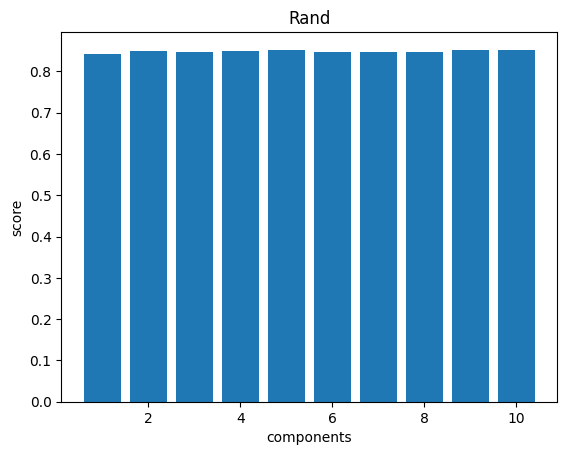

In [84]:
x1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.bar(x1, rand)
plt.plot()
plt.xlabel("components")
plt.ylabel("score")
plt.title("Rand")
plt.show()

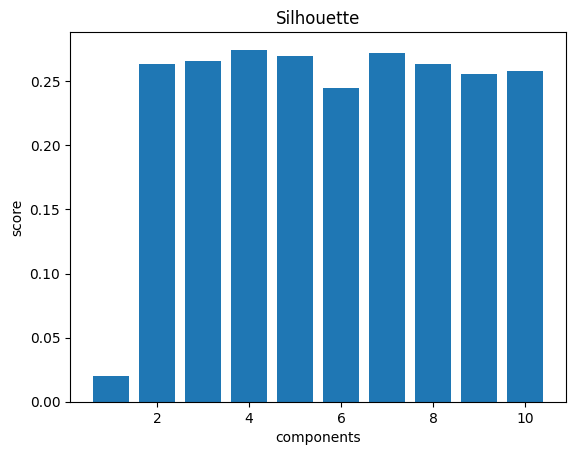

In [85]:
plt.bar(x1, ss)
plt.plot()
plt.xlabel("components")
plt.ylabel("score")
plt.title("Silhouette")
plt.show()

**Accuracy και Rand Index:**

Παρατηρούμε ότι οι μετρικές αυτές δεν δείχνουν σημαντική διακύμανση με τη μεταβολή του n_components.


**Silhouette Score:**

Η μετρική αυτή  είναι πιο ευαίσθητη στις αλλαγές του n_components.
Παρατηρούμε ότι η silhouette score είναι χαμηλή για n_components = 1 και αυξάνεται όσο αυξάνετε το n_components. Αυτό μπορεί να υποδεικνύει ότι η αρχική διάσταση είναι χαμηλή και περιορίζει τη διαχωριστικότητα των clusters.
Τέλος παρατηρούμε  ότι η silhouette score σχεδόν παραμένει σταθερή για n_components απο 2 εως 10 γεγονός που σημαίνει οτι  περισσότερες  απο 2 διαστάσεις δεν προσφέρουν περαιτέρω βελτίωση στη διαχωριστικότητα των clusters.